# Solução de equações diferenciais ordinarias (EDO)

  


Equações diferenciais são ubicuas na ciência e são as ferramentas pelas
quais tentamos expresar as leis de movimento da natureza. 


Nesse capitulo vamos revisar os métodos mais usados na resolução de
equações e sistemas de equações diferenciais ordinarias ODE.
Vamos estudar varias aplicações físicas desses métodos: decaimento radiativo, circuito RL,  o lançamento do projetil, o movimento de uma particula carregada num campo magnético, o pendulo clásico e a estrutura de estrelas (incluindo estrelas de neutrons).

Vamos também utilizar a solução de sistemas de equações para graficar as linhas de campo eletrico gerado por cargas pontuais.

O estudo das equações diferenciais parciais (EDP) é considerado en um curso mais avançado.

A ordem de uma EDO se refer a ordem da derivada ao lado esquerdo da equação, e.g.,

$$
\frac{dy}{dt} = f(t,y)
$$

é uma equação de primeira ordem com $f$ sendo uma função arbitraria. Uma equação de
segunda ordem é:

$$
\frac{d^2y}{dt^2} = f(t,\frac{dy}{dt},y),
$$

cujo exemplo clásico é a segunda lei de Newton:

$$
m \frac{d^2x}{dt^2} = -k x \;.
$$

Em muitos casos é possível escrever uma equação de segunda ordem como duas
EDO de primeira ordem, e.x., para a equação acima:

$$
m \frac{dv}{dt} = -k x \;, \; \; \;    \frac{dx}{dt} = v \;.
$$

Nesse caso teríamos duas equações de primeira ordem acopladas.


## Métodos de diferenças finitas 

### *Método de Euler*

Supondo que temos a condição inicial dada por:

$$
y_0 = y(t = t_0)
$$

Estamos interessados em resolver uma EDO no intervalo $[a,b]$, usando $N$ pasos temporais e/ou espaciais.  Definimos nosso intervalo: $h = \frac{b-a}{N}$

Com esse passo e a derivada de $y$ podemos evaluar o valor seguinte da função $y$ em:

$$
y_1 = y(t_1 = t_0 + h) \;,
$$

e assim sucesivamente. Se a função é suave podemos usar um valor de $h$ constante.
Caso contrario podemos adaptar $h$ em diferentes regioes do dominio $[a,b]$. Para o caso
de $h$ fixo:

$$
y_{i+1} = y(t = t_i + h) = y(t_i) + h \Delta(t_i, y_i(t_i)) + {\cal O}(h^{p+1})  \;,
$$

onde ${\cal O}(h^{p+1})$ representa o erro de truncamento. Para determinar $\Delta$,
expandimos a função $y$ em serie de Taylor:

$$
\Delta(t_i, y_i(t_i)) = (y'(t_i) + ... + y^{(p)}(t_i) \frac{h^{p-1}}{p!})  \;.
$$

Definindo: $y'(t_i) = f(t_i,y_i)$, e truncando $\Delta$ na primeira derivada, temos:

$$
y_{i+1} = y_i  + h \; f(t_i,y_i) + {\cal O}(h^{2})  \;,
$$

Que com $t_{i+1} = t_i + h$, forma o algoritmo conhecido como método de Euler. A cada paso
temos um erro de truncamento de ordem ${\cal O}(h^{2})$, levando a um erro global de
$N{\cal O}(h^{2}) \simeq {\cal O}(h)$.  Aumentar $N$ arbitrariamente pode ajudar más podemos
entrar em problemas de *roundoff*.


Se incluimos a segunda derivada no calculo de $\Delta$ temos:

$$
\Delta(t_i, y_i(t_i)) = f(t_i) + \frac{h}{2}\frac{df(t_i,y_i)}{dt} + {\cal O}(h^{3})
$$

a segunda derivada pode se escrever como:

$$
y'' = f' = \frac{df}{dt} = \frac{\partial f}{\partial t} 
+ \frac{\partial f}{\partial y} \frac{\partial y}{\partial t} = \frac{\partial f}{\partial t}  + \frac{\partial f}{\partial y}  f
$$ 

o que leva a

$$
y_{i+1} = y_i  + h f(t_i) + \frac{h^2}{2}\left( \frac{\partial f}{\partial t}  + \frac{\partial f}{\partial y} f \right)
        + {\cal O}(h^{3})  \;,
$$

com um erro local de ${\cal O}(h^{3})$ e um erro global de ${\cal O}(h^{2})$.
Podemos aprimorar o método tomando a derivada até uma ordem arbitraria, mas calcular numericamente derivadas de alta ordem não é recomendável.


### *Métodos Runge-Kutta*

Os métodos Runge-Kutta também são baseados em expansões de Taylor, não entanto levam a
melhores algoritmos para a solução de EDOs. A filosofía básica desses métodos é o calculo
de um paso intermediario no cálculo de $y_{i+1}$. Consideremos as definições seguintes:

<!-- Equation labels as ordinary links -->
<div id="_auto25"></div>

$$
\begin{equation}
   \frac{dy}{dt}=f(t,y),  
\label{_auto25} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto26"></div>

$$
\begin{equation}
   y(t)=\int f(t,y) dt,  
\label{_auto26} \tag{2}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto27"></div>

$$
\begin{equation}
  y_{i+1}=y_i+ \int_{t_i}^{t_{i+1}} f(t,y) dt.
\label{_auto27} \tag{3}
\end{equation}
$$


Para demonstrar a filosofia dos metodos RK, vamos considerar
inicialmente o método de segunda ordem: RK2. Expandimos $f(t,y)$ arredor do centro
do intervalo de integração $[t_i,t_{i+1}]$, ou seja, em $t_{i+1/2} = t_{i+h/2}$.  Usando a formula da integral no ponto médio, $y(t_i + h/2)$ temos:


<!-- Equation labels as ordinary links -->
<div id="_auto28"></div>

$$
\begin{equation}
    \int_{t_i}^{t_{i+1}} f(t,y) dt \approx hf(t_{i+1/2},y_{i+1/2}) +O(h^3).
\label{_auto28} \tag{4}
\end{equation}
$$

Isto significa que temos

<!-- Equation labels as ordinary links -->
<div id="_auto29"></div>
$$
\begin{equation}
     y_{i+1}=y_i + hf(t_{i+1/2},y_{i+1/2}) +O(h^3).
\label{_auto29} \tag{5}
\end{equation}
$$

No entanto, o valor de $y_{i+1/2}$ ainda é desconhecido. Usamos o método de Euler para aproximar $y_{i+1/2}$, o que leva a:

<!-- Equation labels as ordinary links -->
<div id="_auto30"></div>

$$
\begin{equation}
   y_{(i+1/2)}=y_i + \frac{h}{2}\frac{dy}{dt} =
   y(t_i) + \frac{h}{2}f(t_i,y_i).
\label{_auto30} \tag{6}
\end{equation}
$$

Assim, um algoritmo para o método RK2 seria:

<!-- Equation labels as ordinary links -->
<div id="_auto31"></div>

$$
\begin{equation}
  k_1=hf(t_{i},y_i),
\label{_auto31} \tag{7}
\end{equation}
$$


<!-- Equation labels as ordinary links -->
<div id="_auto32"></div>

$$
\begin{equation}
  k_2=hf(t_{i+1/2},y_i+k_1/2),
\label{_auto32} \tag{8}
\end{equation}
$$

Com valor final:

<!-- Equation labels as ordinary links -->
<div id="_auto33"></div>

$$
\begin{equation} 
  y_{i+i}\approx y_i + k_2 +O(h^3). 
\label{_auto33} \tag{9}
\end{equation}
$$

A diferença com o método de Euler é que agora precisamos calcular um passo intermediario na nossa avaliação da derivada $f$, $t_{i} + h/2 = t_{1+1/2}$.  Isto necessariamente requer mais operações, porem, há um ganho significativo na estabilidade das soluções.

### Runge-Kutta de 4a ordem

Começamos novamente  com a equação:

$$
y_{i+1} = y_i + \int_{t_1}^{t_{i+1}} f(t,y) dt
$$

Mas nao calculamos a integral calculando o ponto médio mas a formula de Simpson:

$$
\int_{t_1}^{t_{i+1}} f(t,y) dt \simeq \frac{h}{6} \left[ f(t_i,y_i) + 4 f(t_{i+1/2}, y_{i+1/2}) + f(t_{i+1},y_{i+1}) \right] + {\cal O}(h^5)
$$

Substituindo temos:

$$
y_{i+1} = y_i + \frac{h}{6} \left[ f(t_i,y_i) +  4 f(t_{i+1/2}, y_{i+1/2}) + f(t_{i+1},y_{i+1}) \right] + {\cal O}(h^5)
$$

De onde $y_{i+1/2}$ e $y_{i+1}$ são ainda desconhecidos. Podemos dividir a seguir a avaliação do ponto médio em dois passos:

$$
y_{i+1} = y_i + \frac{h}{6} \left[ f(t_i,y_i) + 2 f(t_{i+1/2}, y_{i+1/2}) + 2 f(t_{i+1/2}, y_{i+1/2}) + f(t_{i+1},y_{i+1}) \right] + {\cal O}(h^5)
$$


O algoritmo do método RK4 ficaria:

* Computamos primeiro: $k_1 = h f(t_i,y_i)$ (parando aqui teriamos o metodo de Euler)
* calculamos a inclinação no ponto médio usando o método de Euler:

$$
k_2 = h f(t_i+h/2, y_i+k_1/2).
$$

* A inclinação corrigida é usada para calcular a inclinação de $y_{i+1/2}$ calculando

$$
k_3 = h f(t_i+h/2, y_i+k_2/2).
$$

* Com a última inclinação podemos preveer o valar de $y_{i+1}$ usando

$$
k_4 = h f(t_i+h, y_i+k_3).
$$

A última conta é

$$
y_{i+1} = y_i + \frac{1}{6}(k_1 + 2 k_2 + 2k_3 + k_4). 
$$


Dessa forma, o algoritmo consiste em calcular inicialmente $k_1$ a partir de $t_1$, $y_1$ e $f$ como parametros de entrada. Então fazemos um incremento no passo por $h/2$ e calculamos $k_2$, $k_3$ e finalmente $k_4$.  O resultado é o valor da variável $y$ evoluida no tempo (ou no espaço).  Contrario ao metodo de Euler, onde evoluímos a variável em apenas um computo, e do método RK2, onde fazemos 2 calculos, o método RK4 requer 4 avaliações de $f$, logo é mais devagar. No entanto o método tem erro de truncamento que vai como ${\cal O}(h^4)$.  A figura seguinte ajuda a entender de forma geométrica o método.


<img src="Figs/rk10.png" width=80% >

In [40]:
import matplotlib.pylab as plt

In [121]:
def rk4 ( t0, u0, dt, f ):
    # Fazemos 4 avaliações da derivada
    # cada avaliação chama a funçao f e a avalia em instantes de tempo
    # avançados por h/2.
    f1 = f ( t0,            u0 )
    f2 = f ( t0 + dt / 2.0, u0 + dt * f1 / 2.0 )
    f3 = f ( t0 + dt / 2.0, u0 + dt * f2 / 2.0 )
    f4 = f ( t0 + dt,       u0 + dt * f3 )
    u1 = u0 + dt * ( f1 + 2.0 * f2 + 2.0 * f3 + f4 ) / 6.0
    return u1


#### Test 1

Vamos resolver a equação

$$
\frac{dy(t)}{dt} = -k y(t)
$$

com $k=0.3$ e condição inicial, $y(0) = 5$.  O tempo máximo de evolução é $t=10$.  

(Solução analítica: $y(t) = y(0) \exp (-k t)$.)

In [112]:
def rk4_test1 ( ):
    import numpy as np
    import platform
    dt = 0.1
    t0 = 0.0
    tmax = 10.
    u0 = 5.
    t_num = int ( 2 + ( tmax - t0 ) / dt )
    t = np.zeros ( t_num )
    u = np.zeros ( t_num )
    
    i = 0
    t[0] = t0
    u[0] = u0
    
    while ( True ):
        #print ( '  %4d  %14.6f  %14.6g' % ( i, t0, u0 ) )
        if ( tmax <= t0 ):
            break
        t1 = t0 + dt
        u1 = rk4 ( t0, u0, dt, rk4_test1_f )
        i = i + 1
        t[i] = t1
        u[i] = u1
        t0 = t1
        u0 = u1
    return t,u

In [113]:
def rk4_test1_f ( t, u ):
    import numpy as np
    k = 0.3
    value = -k *u 
    return value

In [114]:
t,u = rk4_test1()

Text(0, 0.5, 'y')

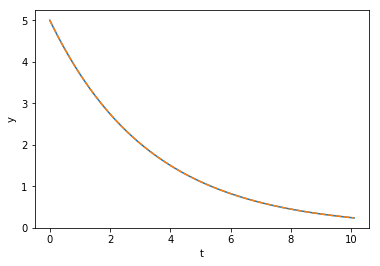

In [120]:
plt.plot(t,u)
plt.plot(t,5.*np.exp(-0.3*t),linestyle='--')
plt.xlabel('t')
plt.ylabel('y')

#### Test 2

Agora vamos resolver a equação 

$$
5 \frac{dy(t)}{dt} = - y(t) + V(t)
$$

Com a condição inical $y(0) = 1$.  O termo de forçamento, $V(t)$, muda de 0 a 2 quando $t=10$. 


In [104]:
def rk4_test2 ( ):
    import numpy as np
    import platform
    
    n = 1000
    t = np.linspace(0.,40.,n)
    print('shape = ',t.shape)
    dt = t[1] - t[0]
    
    t0 = t[0]
    tmax = t[-1]
    
    u = np.zeros_like( t )
    u0 = 1.
    
    i = 0
    t[0] = t0
    u[0] = u0
    
    for i in range (n-1):
        #print ( '  %4d  %14.6f  %14.6g' % ( i, t0, u0 ) )
        t1 = t0 + dt
        u1 = rk4 ( t0, u0, dt, rk4_test2_f )
        i = i + 1
        t[i] = t1
        u[i] = u1
        t0 = t1
        u0 = u1
    return t,u

In [105]:
def rk4_test2_f ( t, u ):
    import numpy as np
    if t < 10.:
        V = 0
    else:
        V = 2.
        
    value = (-u + V)/5.
    return value

In [106]:
t1,u1 = rk4_test2()

shape =  (1000,)


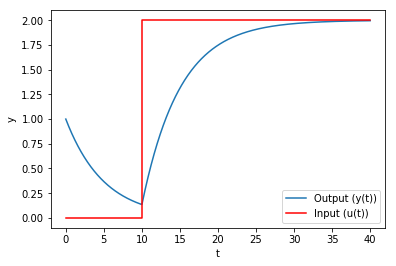

In [111]:
plt.plot(t1,u1,label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))',c='r')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

Já que varias equações podem ser resolvidas simulataneamente, é comum utilizar
criar um vetor ${\bf y}$ para definir tais variáveis. Por exemplo

$$
x(t) = y^{(0)}(t)  \;, \; \; \; v(t) =  y^{(1)}(t)
$$

$$
\frac{y^{(0)}(t)}{dt} = y^{(2)}(t) \;, \; \; \; \frac{y^{(1)}(t)}{dt}  =  -\frac{k}{m} y^{(0)}(t)\;.
$$

Para que o sistema de equações seja bem determinado, precisamos, para o exemplo anterior,
conhecer as condiçoes iniciais $y^{(0)}(0)$  e $y^{(1)}(0)$.  Quando as equaçoes não
evoluem no tempo mas queremos determinar a distribuição no espaço de uma determinada quantidade,  precisamos condiçoes de contorno.
